In [2]:
import pandas as pd
import numpy as np

In [3]:
xlsx = pd.ExcelFile('https://raw.githubusercontent.com/dsaha78/mtech/main/02ml/input/Plant_Tree_data.xlsx')
dataset = pd.read_excel(xlsx, 'Sheet1')
print(dataset.head)

<bound method NDFrame.head of        LeafLength  LeafBreadth  ...  TreeLength  TreeType
0      140.562500    55.683782  ...   74.242225         0
1      102.507812    58.882430  ...  127.393580         0
2      103.015625    39.341649  ...   63.171909         0
3      136.750000    57.178449  ...   53.593661         0
4       88.726562    40.672225  ...  252.567306         0
...           ...          ...  ...         ...       ...
17893  136.429688    59.847421  ...  285.931022         0
17894  122.554688    49.485605  ...    8.297092         0
17895  119.335938    59.935939  ...    4.595173         0
17896  114.507812    53.902400  ...  134.238910         0
17897   57.062500    85.797340  ...    1.429475         0

[17898 rows x 9 columns]>


Checking if we have null or missing value

In [4]:
dataset.isnull().sum()

LeafLength            0
LeafBreadth           0
ErrorLeafLength       0
ErrorLeafBreadth      0
LeafCurveAngle        0
EdgeCurvatureAngle    0
ErrorLeafCurvature    0
TreeLength            0
TreeType              0
dtype: int64

Split features and labels [0.5M]

In [5]:
X = dataset.iloc[:,:-1].values
print('Independet Variables:')
print(X)
print()

Y = dataset.iloc[:,-1].values
print('Dependet Variables:')
print(Y)
print()

Independet Variables:
[[140.5625      55.68378214  -0.23457141 ...  19.11042633   7.97553179
   74.24222492]
 [102.5078125   58.88243001   0.46531815 ...  14.86014572  10.57648674
  127.3935796 ]
 [103.015625    39.34164944   0.32332837 ...  21.74466875   7.73582202
   63.17190911]
 ...
 [119.3359375   59.93593941   0.1593631  ...  58.8720002    2.49951714
    4.59517265]
 [114.5078125   53.90239966   0.20116138 ...  13.38173065  10.00796731
  134.2389095 ]
 [ 57.0625      85.79734025   1.40639105 ...  64.71256228  -1.59752658
    1.42947536]]

Dependet Variables:
[0 0 0 ... 0 0 0]



 Split train and test data [0.5M]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 101)
print("X_train shape:", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape: {}", y_test.shape)

X_train shape: (14318, 8)
X_test shape (3580, 8)
y_train shape: (14318,)
y_test shape: {} (3580,)


# Implementation of Random Forest Classifier with scikit.

In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
## Prediction
y_pred=classifier.predict(X_test)

# Calulate Accurecy

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
## compute and print Accuracy
score=accuracy_score(y_test,y_pred)
print('Accuracy: {:2f}%'.format(score * 100))
error=mean_absolute_error(y_test,y_pred)
print('Error Rate: {:2f}%'.format(error * 100))

Accuracy: 98.324022%
Error Rate: 1.675978%


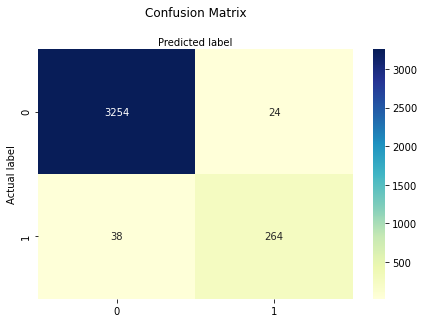

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb
random_forest_confusion_matrix = confusion_matrix(y_test, y_pred)
#Plot the confusion matrix.
class_names = ['Fake','Authentic']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sb.heatmap(pd.DataFrame(random_forest_confusion_matrix), annot = True,
cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix\n')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Nural network with keras.

In [11]:
import keras
from keras.models import Model, Sequential
from keras.layers import Dense, Activation
import keras.backend as K
from keras.optimizers import Adam
from keras import optimizers

In [ ]:
#Clear the session
K.clear_session()

In [12]:
#Construct the model
nin = X_train.shape[1]
nout = np.max(y_train) + 1
nh = 100
model = Sequential()
model.add(Dense(nh, input_shape=(nin, ), activation='relu', name= 'fc1'))
model.add(Dense(nh, activation='relu', name='fc2'))
model.add(Dense(nout, activation = 'softmax', name = 'output'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 100)               900       
_________________________________________________________________
fc2 (Dense)                  (None, 100)               10100     
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 11,202
Trainable params: 11,202
Non-trainable params: 0
_________________________________________________________________


In [14]:
opt = optimizers.Adam(lr = 0.001)
model.compile(optimizer=opt, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
batch_size = 100
model.fit(X_train, y_train, epochs = 10, batch_size=batch_size, validation_data=(X_test, y_test))
results = model.evaluate(X_test, y_test)

Epoch 1/10
144/144 [==============================] - 1s 5ms/step - loss: 0.3625 - accuracy: 0.9398 - val_loss: 0.0883 - val_accuracy: 0.9788
Epoch 2/10
144/144 [==============================] - 0s 2ms/step - loss: 0.1227 - accuracy: 0.9709 - val_loss: 0.1662 - val_accuracy: 0.9726
Epoch 3/10
144/144 [==============================] - 0s 2ms/step - loss: 0.1631 - accuracy: 0.9682 - val_loss: 0.0870 - val_accuracy: 0.9779
Epoch 4/10
144/144 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 0.9690 - val_loss: 0.0782 - val_accuracy: 0.9749
Epoch 5/10
144/144 [==============================] - 0s 2ms/step - loss: 0.0915 - accuracy: 0.9739 - val_loss: 0.1252 - val_accuracy: 0.9648
Epoch 6/10
144/144 [==============================] - 0s 2ms/step - loss: 0.1090 - accuracy: 0.9705 - val_loss: 0.0896 - val_accuracy: 0.9751
Epoch 7/10
144/144 [==============================] - 0s 2ms/step - loss: 0.1041 - accuracy: 0.9728 - val_loss: 0.0971 - val_accuracy: 0.9802
Epoch 

In [16]:
print('Final test set loss: {:2f}%'.format(results[0] * 100))
print('Final test set accuracy: {:2f}%'.format(results[1] * 100))

Final test set loss: 8.878711%
Final test set accuracy: 97.681564%


In [17]:
#Clear the session
K.clear_session()
#Construct the model
nin = X_train.shape[1]
nout = np.max(y_train) + 1
nh = 100
model = Sequential()
model.add(Dense(nh, input_shape=(nin, ), activation='relu', name= 'fc1'))
model.add(Dense(nh, activation='relu', name='fc2'))
model.add(Dense(nout, activation = 'softmax', name = 'output'))

In [19]:
#Learning rate as 0.01
opt = optimizers.Adam(lr = 0.01)
model.compile(optimizer=opt, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
batch_size = 100
model.fit(X_train, y_train, epochs = 10, batch_size=batch_size, validation_data=(X_test, y_test))
results = model.evaluate(X_test, y_test)

Epoch 1/10
144/144 [==============================] - 1s 3ms/step - loss: 1.1877 - accuracy: 0.9345 - val_loss: 0.0754 - val_accuracy: 0.9793
Epoch 2/10
144/144 [==============================] - 0s 2ms/step - loss: 0.1068 - accuracy: 0.9728 - val_loss: 0.0900 - val_accuracy: 0.9788
Epoch 3/10
144/144 [==============================] - 0s 2ms/step - loss: 0.0947 - accuracy: 0.9734 - val_loss: 0.0965 - val_accuracy: 0.9743
Epoch 4/10
144/144 [==============================] - 0s 2ms/step - loss: 0.0965 - accuracy: 0.9745 - val_loss: 0.0714 - val_accuracy: 0.9799
Epoch 5/10
144/144 [==============================] - 0s 2ms/step - loss: 0.0882 - accuracy: 0.9756 - val_loss: 0.1020 - val_accuracy: 0.9709
Epoch 6/10
144/144 [==============================] - 0s 2ms/step - loss: 0.0941 - accuracy: 0.9744 - val_loss: 0.0741 - val_accuracy: 0.9777
Epoch 7/10
144/144 [==============================] - 0s 2ms/step - loss: 0.0874 - accuracy: 0.9762 - val_loss: 0.0720 - val_accuracy: 0.9785
Epoch 

In [27]:
print('Final test set loss: {:2f}%'.format(results[0] * 100))
print('Final test set accuracy: {:2f}%'.format(results[1] * 100))

Final test set loss: 7.125445%
Final test set accuracy: 97.932959%
